# Food Marketing Data Analysis Project

This is a case study on iFood, the leading food delivery app in Brazil. The goal of this project is to use real customer data to improve the effectiveness of marketing activities.

In [3]:
import pandas as pd

In [5]:
food = pd.read_csv(r'C:\Users\Stephen\Documents\Data Analysis\Analyst Builder\Python projects\u_food_marketing.csv')
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


### Clean and Transform Data

In [10]:
# Remove duplicate rows
food.drop_duplicates(keep = False, inplace = True)

In [12]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

In [14]:
# Combine the 'kidhome' and 'teenhome' columns into one column
food['Total_Children'] = food[['Kidhome','Teenhome']].sum(axis = 1)

In [16]:
# Combine the five marital status columns into one column (encode with numbers 1-5)
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5, 0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4, 0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3, 0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2, 0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1, 0:0})

food['Marital_Status'] = food[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].sum(axis = 1)
food['Marital_Status_str'] = food['Marital_Status'].map({5: 'Divorced', 4: 'Married', 3: 'Single', 2: 'Together', 1: 'Widow'})

In [18]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0,3,Single
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2,3,Single
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0,2,Together
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1,2,Together
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4,Married


In [20]:
# Combine the five education columns into one column (encode with numbers 1-5)
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1, 0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2, 0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3, 0:0})
food['education_Master'] = food['education_Master'].replace({1:4, 0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5, 0:0})

food['Education_Status'] = food[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].sum(axis = 1)
food['Education_Status_str'] = food['Education_Status'].map({5: 'PhD', 4: 'Masters', 3: 'Graduation', 2: 'Basic', 1: '2n Cycle'})

In [22]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Education_Status_str
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Graduation
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,Graduation
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,Graduation
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,Graduation
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,PhD


In [51]:
# Add a column indicating how many of the marketing campaigns the customer accepted
food['Accepted_Campaigns'] = food[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis = 1)
food.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Education_Status_str,Accepted_Campaigns,Age_Group
2198,26816.0,0,0,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,...,0,0,3,0,0,0,0,3,0,0,19,16,0,0,3,Single,3,Graduation,0,Unknown
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,...,0,4,0,0,0,0,0,3,0,0,1094,847,0,1,4,Married,3,Graduation,0,Unknown
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,...,5,0,0,0,0,0,0,3,0,0,1217,1193,1,0,5,Divorced,3,Graduation,1,Unknown
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,...,0,0,0,2,0,0,0,0,4,0,782,721,0,1,2,Together,4,Masters,0,Unknown
2204,52869.0,1,1,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,5,151,130,0,2,4,Married,5,PhD,0,Unknown


### Exploratory Data Analysis

In [53]:
# Display the correlation between number of marketing campaigns accepted and all other numeric variables
correlations = food.corr(method = 'pearson', numeric_only = True)['Accepted_Campaigns'].sort_values(ascending = False)
correlations

Accepted_Campaigns      1.000000
AcceptedCmpOverall      1.000000
AcceptedCmp5            0.710378
AcceptedCmp1            0.688068
AcceptedCmp4            0.600645
MntWines                0.496881
MntTotal                0.452785
MntRegularProds         0.452599
AcceptedCmp2            0.442677
AcceptedCmp3            0.433521
Response                0.418309
Income                  0.384189
NumCatalogPurchases     0.361530
MntMeatProducts         0.314922
NumStorePurchases       0.217062
NumWebPurchases         0.204276
MntSweetProducts        0.196385
MntGoldProds            0.193886
MntFruits               0.169489
MntFishProducts         0.158858
Education_Status        0.035873
education_PhD           0.027418
marital_Widow           0.023738
education_Graduation    0.006934
marital_Married         0.006627
marital_Single          0.003951
education_Master       -0.003815
Marital_Status         -0.007273
marital_Divorced       -0.012311
marital_Together       -0.012562
Customer_D

In [55]:
# Filter the results to identify the strongest correlations
corr_filter = correlations[((correlations > 0.3) | (correlations < -0.3)) & (correlations != 1)]
corr_filter

AcceptedCmp5           0.710378
AcceptedCmp1           0.688068
AcceptedCmp4           0.600645
MntWines               0.496881
MntTotal               0.452785
MntRegularProds        0.452599
AcceptedCmp2           0.442677
AcceptedCmp3           0.433521
Response               0.418309
Income                 0.384189
NumCatalogPurchases    0.361530
MntMeatProducts        0.314922
Name: Accepted_Campaigns, dtype: float64

In [71]:
# Segment customer ages
age_groups = [(23,30), (31,40), (41,50), (51,60), (61,70), (71,85)]

def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f'{age_range[0]}-{age_range[1]}'
    return('Unknown')

food['Age_Group'] = food['Age'].apply(assign_age_group)
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Education_Status_str,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Graduation,0,61-70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,Graduation,0,61-70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,Graduation,0,51-60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,Graduation,0,31-40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,PhD,0,31-40


In [63]:
import seaborn as sns

[Text(0.5, 1.0, 'Number of Accepted Campaigns vs. Age')]

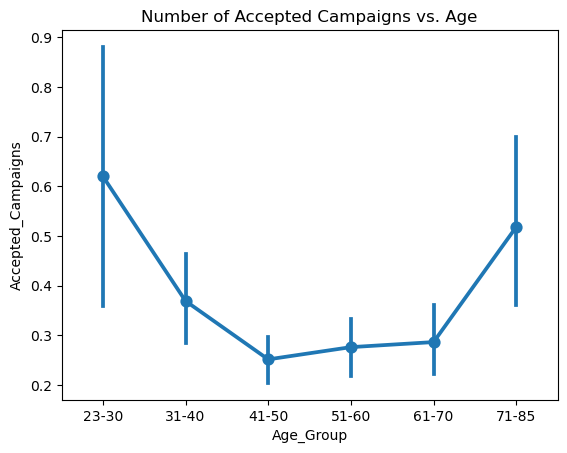

In [95]:
# Visualize the number of accepted marketing campaigns for customers in each age group
age_order = ['23-30', '31-40', '41-50', '51-60', '61-70', '71-85']

sns.pointplot(data = food, x = 'Age_Group', y = 'Accepted_Campaigns', order = age_order).set(title = 'Number of Accepted Campaigns vs. Age')

In [79]:
# Check how many customers are in each age group
counts = food['Age_Group'].value_counts()
counts

Age_Group
41-50    612
51-60    409
61-70    391
31-40    298
71-85     83
23-30     50
Name: count, dtype: int64

In [81]:
# Show the age distribution as percentages
percentage = counts/food.shape[0]
percentage

Age_Group
41-50    0.332067
51-60    0.221921
61-70    0.212154
31-40    0.161693
71-85    0.045035
23-30    0.027130
Name: count, dtype: float64

In [89]:
# Create a new dataframe with age_groups and percentages
percent_age = percentage.reset_index()
percent_age.columns = ['age_group', 'percentage']
percent_age.sort_values('age_group')

,age_group,percentage
5,23-30,0.027130
3,31-40,0.161693
0,41-50,0.332067
1,51-60,0.221921
2,61-70,0.212154
4,71-85,0.045035


[Text(0.5, 1.0, 'Customer Age Distribution')]

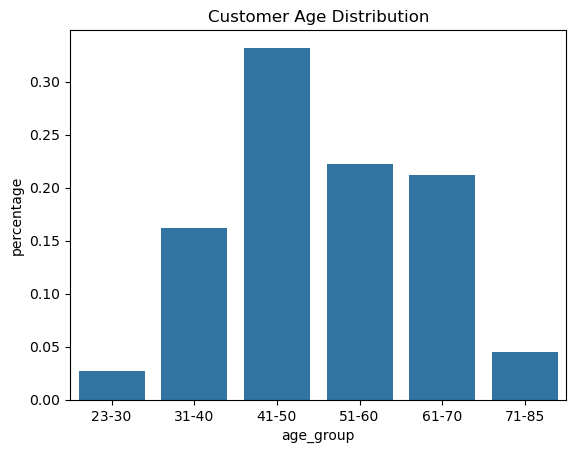

In [97]:
# Visualize the age distribution of the customers
sns.barplot(x = 'age_group', y = 'percentage', data = percent_age, order = age_order).set(title = 'Customer Age Distribution')

The core audience for accepting marketing campaigns is customers aged 31-70.

[Text(0.5, 1.0, 'Total Amount Spent Per Age Group (Accepted Campaigns)')]

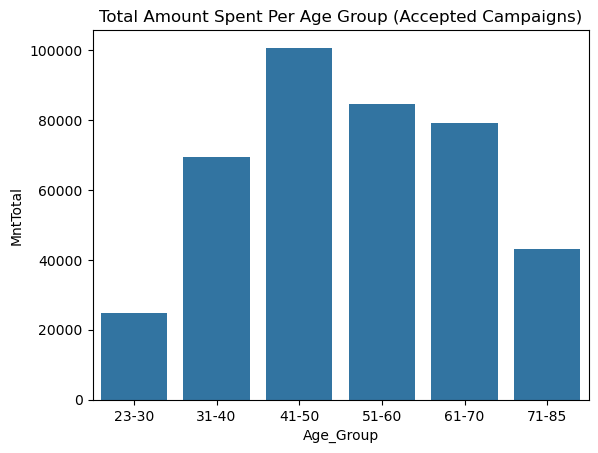

In [136]:
# Examine the total amount spent per age group (for customers who accepted at least one campaign)
accept_camp = food[food['Accepted_Campaigns'] != 0]
grouped_food = accept_camp.groupby('Age_Group')['MntTotal'].sum().reset_index()

# Visualize the result
sns.barplot(x = 'Age_Group', y = 'MntTotal', data = grouped_food).set(title = 'Total Amount Spent Per Age Group (Accepted Campaigns)')

The core age range among customers who accepted at least one marketing campaign is also 31-70.

In [130]:
# Check the number of purchases per purchase type (for customers who accepted at least one campaign)
accept_camp = food[food['Accepted_Campaigns'] != 0]
sum_food = pd.DataFrame(accept_camp[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(), columns = ['Sums'])
sum_food = sum_food.reset_index()
sum_food.rename(columns = {'index':'Type_of_Purchase'}, inplace = True)
sum_food

,Type_of_Purchase,Sums
0,NumWebPurchases,2090
1,NumCatalogPurchases,1723
2,NumStorePurchases,2761


[Text(0.5, 1.0, 'Number of Purchases Per Purchase Type (Accepted Campaigns)')]

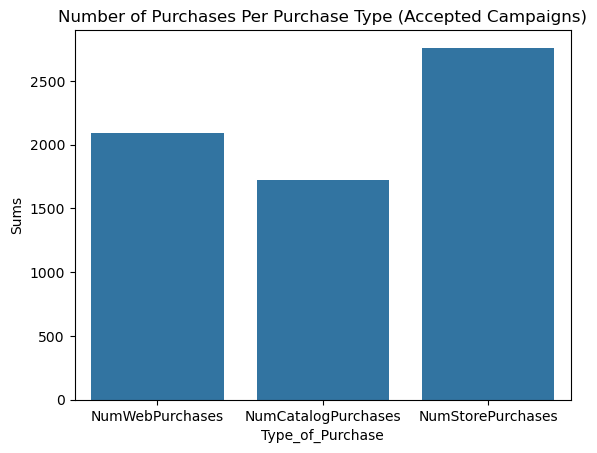

In [134]:
# Visualize this data
sns.barplot(x = 'Type_of_Purchase', y = 'Sums', data = sum_food).set(title = 'Number of Purchases Per Purchase Type (Accepted Campaigns)')

Customers who accepted marketing campaigns made the most purchases in-store, followed by web purchases.

In [170]:
# Find the number of times each marketing campaign was accepted
campaign = pd.DataFrame({'Total # of Accepts':[accept_camp['AcceptedCmp1'].sum(),
                                               accept_camp['AcceptedCmp2'].sum(),
                                               accept_camp['AcceptedCmp3'].sum(),
                                               accept_camp['AcceptedCmp4'].sum(),
                                               accept_camp['AcceptedCmp5'].sum()]})
campaign.index += 1
campaign

,Total # of Accepts
1,124
2,22
3,139
4,146
5,132


[Text(0.5, 1.0, 'Number of Accepts for Each Marketing Campaign')]

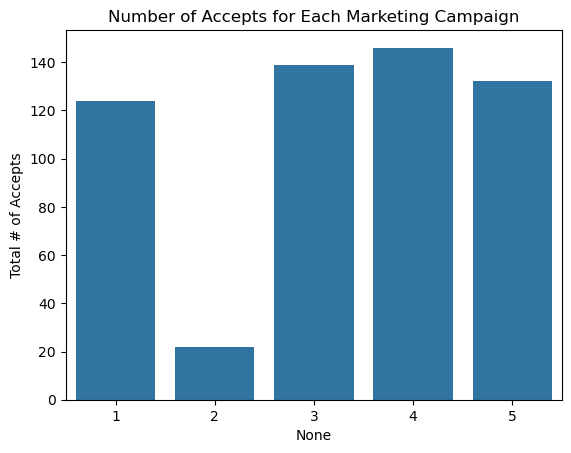

In [176]:
# Visualize the result
sns.barplot(x = campaign.index, y = 'Total # of Accepts', data = campaign).set(title = 'Number of Accepts for Each Marketing Campaign')

Marketing campaign 2 was unsuccessful, and should not be used. Campaign 4 was the most successful, followed by campaigns 3 and 5.